In [1]:
from __future__ import print_function

#Data Visualization

##Introduction to Matplotlibs Internals

###1: Overview

There are many methods to plot data, including:
- Matplotlib's high-level plotting methods - e.g. .scatter(), .plot()
- Seaborn's high-level plotting methods - e.g. .distplot(), .boxplot()
- Pandas DataFrame methods - e.g. .hist(), .boxplot()

All three of these techniques use lower-level Matplotlib methods to create, modify, and display plots while allowing us to call their simpler, higher level methods to quickly generate standard plots with some ability to customize the plots.

We'll be focusing this mission on learning more about the different components of a Matplotlib data graphic so you can create more customizable data visualizations.

###2: Levels of abstraction

The key thing to keep in mind when diving deeper into Matplotlib is that the library was designed to be effective at understanding your intent, no matter the level of abstraction. There are many ways to create the same plot in Matplotlib and most of the differences come down to the level of abstraction you want to work with for a specific task! 

To give you a better sense of what we mean, create a simple scatter plot using a higher level Matplotlib method and then we'll walk through how to create the same scatter plot at a lower level of abstraction.

####Instructions

Use the Matplotlib .scatter() method to create a scatter plot with the month on the x-axis and temperature on the y-axis and then display the plot.

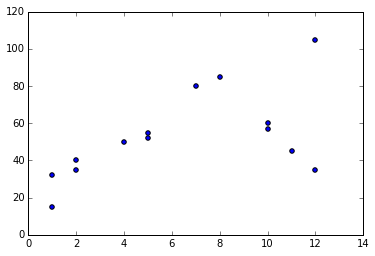

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# 2 simple lists of values.
month = [1,1,2,2,4,5,5,7,8,10,10,11,12,12]
temperature = [32,15,40,35,50,55,52,80,85,60,57,45,35,105]
plt.scatter(month, temperature)
plt.show()

###3: High level of abstraction

To generate the above scatter plot, you only had to pass in the 2 lists of data into the Pyplot .scatter() function and Matplotlib took care of the rest. Since you only had to provide the data and select the plot you want, this is the highest level of abstraction. Matplotlib made some intelligent assumptions to generate a simple scatter plot based on the data we specified.

To better understand how to create the same scatter plot at a lower level of abstraction, you first need to learn more about how Matplotlib works. We won't dive completely into how Matplotlib works at the lowest level of abstraction in this mission but you will learn more about some of its internals. To start, let's learn about Figures, Subplots, and Axes objects. Now for a quick note before diving in!

In previous data visualization missions, we mostly taught the stateful way of using Matplotlib, which meant calling all functions from the plt object (the Matplotlib pyplot object). We'll be focusing on the object oriented way of using Matplotlib in this mission, which is easier to understand when diving into the inner workings and is also more Pythonic (or similar in style to the rest of the Python language). In addition, the object oriented way of using Matplotlib is more explicit, which makes working with multiple plots much easier.

###4: Figures and Subplots

Figure is the top-level Matplotlib object that manages the entire plotting area. A Figure instance acts as a container for your plots and has some useful parameters and methods:
- The figsize(w,h) parameter lets you specify the width w and height h, in inches, of the plotting area
- The dpi parameter lets you specify the density, in dots per inch
- The .add_subplot() method lets you add individual plots to the Figure instance

Subplot is the Matplotlib object that you use to create the axes for a plot. While a Figure can contain multiple subplots that are laid out on a grid, let's start by just working with one plot.

In the following code cell, we:
- call plt.figure() to instantiate a new Figure instance (width: 5 inches, height: 7 inches)
- assign the Figure to the variable fig
- call .add_subplot(1,1,1) on the Figure instance to add an empty plot
- assign the Subplot to the variable ax
- call plt.show() to display our wonderful creation

You'll notice we passed 1,1,1 into the Figure's .add_subplot() method. This style is called grid notation and you use it to express the layout of plots and which plot you want returned from that function call.
- the first parameter refers to the row number 1
- the second parameter refers to the column number 2
- the third parameter refers to the nth plot in the Figure to be returned (only 1 plot in this case)

We'll dive more into subplots and grid notation later in this lesson but, for now, let's run the code and see how everything looks.

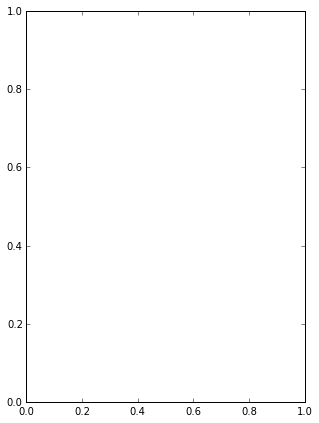

type(fig): <class 'matplotlib.figure.Figure'>
type(ax): <class 'matplotlib.axes._subplots.AxesSubplot'>


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(5,7))
ax = fig.add_subplot(1,1,1)
plt.show()

# Print the types.
print("type(fig):", type(fig))
print("type(ax):", type(ax))

###5: Axes

You'll notice that the plot has a width to height ratio of 5 to 7, contains only 1 plot, and both the x and y axes ticks run from 0.0 to 1.0. In addition to displaying the plots, we also displayed the types for fig and ax. You'll notice that the Subplot we created ax is nested under matplotlib.axes - matplotlib.axes._subplots.AxesSubplot.

A Subplot is an abstraction that creates an Axes object whenever you call .add_subplot(). An Axes object controls how the plotting actually happens. The Axes object describes what's actually inside the plot we're interested in (like the points in a scatter plot) and also describes the x and y axes, including the ticks, labels, etc. While each Figure instance can contain multiple plots, and therefore multiple axes objects, that specify how each plot looks, each unique Axes object can only belong to one figure. Subplots and Axes are synonomous for our purposes but working with subplots is a much cleaner and convenient interface.

When you instantiate an Axes object, Matplotlib creates, with default attributes:
- a rectangle for the plot
- default x-axis ticks
- default y-axis ticks

Even though default values are used for these properties upon instantiation, you can access and explicity modify all of these values to get the plot you want.

To prepare the x-axis and y-axis ticks for the data we'll be plotting, we can use the .xlim() and .ylim() methods on the Axes instance (ax) to set the range of values we want for the x-axis and y-axis ticks. In the code below, we've set the range of values for the x-axis as 0 to 14. The first parameter for both functions is the lower bound and the second parameter is the upper bound we want for that axis. Here's the documentation on the <a href = "http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_ylim">.set_ylim method</a>.

####Instructions

Since we're working with data from the lists month and temperature, we want to set the x and y axis ticks to match the ranges of the values in those lists. Set the x-axis ticks to range from the lowest value in month to the highest value in month. Set the y-axis ticks to range from the lowest value in temperature to the highest value in temperature.

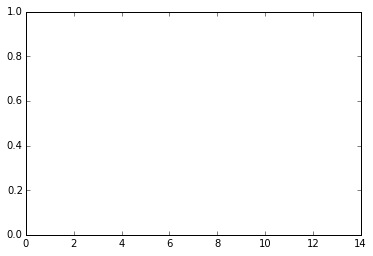

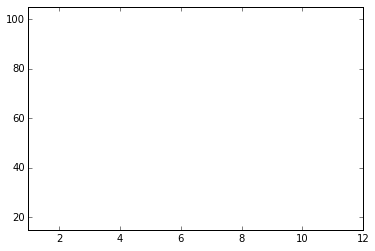

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

month = [1,1,2,2,4,5,5,7,8,10,10,11,12,12]
temperature = [32,15,40,35,50,55,52,80,85,60,57,45,35,105]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlim([0,14])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlim([np.min(month), np.max(month)])
ax.set_ylim([np.min(temperature), np.max(temperature)])
plt.show()

###6: Adding data

We now need to graph the actual dots in the scatter plot using the 2 list objects from before, month and temperature. The Axes object we created contains a method called .scatter() that generates points for each combination of values on the plot. We can even specify the color and the symbol (or marker) we want for the points through the method's parameters.

In the following code cell, we use the color parameter to specify the color for the dots in the scatter plot and the marker paremter to specify the actual symbol each dot represents. The color parameter is very flexible and can take text inputs like 'r' or 'red' or custom RGB values. The marker parameter, however, must be one of the accepted options from the <a href = "http://matplotlib.org/api/markers_api.html#module-matplotlib.markers">Matplotlib documentation</a>. We'll use darkblue for the color and the o marker, representing a standard circular dot.

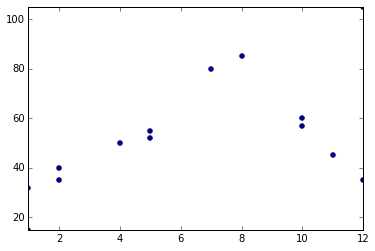

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

month = [1,1,2,2,4,5,5,7,8,10,10,11,12,12]
temperature = [32,15,40,35,50,55,52,80,85,60,57,45,35,105]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlim([np.min(month),np.max(month)])
ax.set_ylim([np.min(temperature), np.max(temperature)])

color = 'darkblue'
marker = 'o'

# run the .scatter() method, params: color, marker.
ax.scatter(month, temperature, color='darkblue', marker='o')
plt.show()

###7: Customizing the plot

Our scatter plot is almost ready! We're missing a few things however: 
- The axes ticks we set were too tight and caused the first and last points in our plot to be cut off
- The axes are missing names, or labels, that describe what the values represent
- The plot is missing a title

####Instructions

Use the Axes object to make the following modifications:
- change the x-axis ticks to range from 0 to 13
- change the y-axis ticks to range from 10 to 110
- set the x-axis label as "Month" using the method: ax.set_xlabel(), parameter: String
- set the y-axis label as "Temperature" using the method: ax.set_ylabel(), parameter: String
- set the title of the plot to "Year Round Temperature" using the method: ax.set_title(), parameter: String

Here's a link to the documentation on all of the Axes methods: <a href = "http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.set_xlabel">Matplotlib Documentation for Axes</a>.

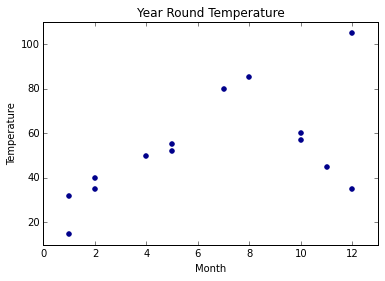

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

month = [1,1,2,2,4,5,5,7,8,10,10,11,12,12]
temperature = [32,15,40,35,50,55,52,80,85,60,57,45,35,105]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_xlim(0,13)
ax.set_ylim(10, 110)
ax.set_xlabel('Month')
ax.set_ylabel('Temperature')
ax.set_title('Year Round Temperature')

color = 'darkblue'
marker = 'o'

# run the .scatter() method, params: color, marker.
ax.scatter(month, temperature, color='darkblue', marker='o')
plt.show()

###8: Setting multiple attributes easily

In the previous code cell, we painstakingly specified each property we wanted for the plot using different methods, all starting with set_, for each one. Matplotlib thankfully has a .set() method that we can use to specify all the attributes we want that Axes object to have in the parameters of that function call. In the following code cell, we demonstrate how to use the .set() method to set the x and y axes ranges and we ask you to set the rest!

####Instructions

Add the xlabel, ylabel, and title attributes to the .set() call we wrote for you, using the values for those attributes from the previous code cell.

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

ax.set(xlim=(0,13), ylim=(10,110), xlabel='Month', ylabel='Temperature', title='2014')
ax.scatter(month, temperature, color='darkblue', marker='o')
plt.show()

In [8]:
###9: Multiple subplots

If you wanted our Figure instance to have 2 plots on the same grid, you'll need to modify the parameters you pass to .add_subplot(). Recall the parameters for the .add_subplot() function:

    fig..add_subplot(nrows, ncols, plot_number)

When adding multiple subplots to the same Figure instance by calling .add_subplot() each time for each plot you want, the first 2 parameters remain the same and only the third parameter, plot_number, changes based on which plot you want returned from that specific function call. To place 2 subplots on the plotting area vertically, where one plot is aboce the other, you'll need to specify that you want a grid with 2 rows and 1 column, and then to return plot_number 1 the first time and plot_nubmer 2 the second time:

    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)

The figure instance now has a grid of plots, 2 rows by 1 column, ax1 is the Axes object for the first, or top, plot, and ax2 is the Axes object for the second, or bottom, plot. You may be wondering how the library determines the plot_number, especially if you have a square grid that has 2 rows and 2 columns, for example. Matplotlib iterates through the plots in the grid row-wise, so if you have a grid with 2 rows and 2 columns, the 2nd plot (plot_number = 2) is located at row 1 and column 2 while the 3rd plot (plot_number = 3) is located at row 2 and column 1.

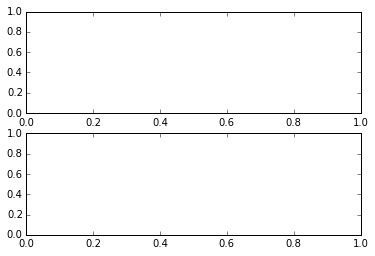

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

###10: Adding data to multiple subplots

To make this more compelling, let's instead lay out our plots over 2 columns and 1 row and plot 2 different datasets so you can easily compare 2 different year's temperature scatter plots.

####Instructions

Generate a grid of plots, 2 columns by 1 row, with the following attributes:
- The left plot is a scatter plot with month_2013 on the x-axis and temperature_2013 on the y-axis
- The left plot has a title of 2013
- The left plot's dots are darkblue, circular marker
- The right plot is a scatter plot with month_2014 on the x-axis and temperature_2014 on the y-axis
- The right plot has a title of 2014
- The right plot's dots are darkgreen, circular marker
- Both plots have the same x and y axes ranges as before (x: 0 to 13, y: 10 to 110)

This exercise is a little bit challenging but will help youpractice all the concepts you've learned in this lesson.

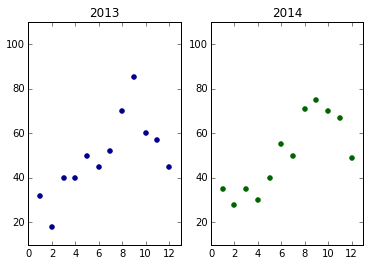

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

month_2013 = [1,2,3,4,5,6,7,8,9,10,11,12]
temperature_2013 = [32,18,40,40,50,45,52,70,85,60,57,45]
month_2014 = [1,2,3,4,5,6,7,8,9,10,11,12]
temperature_2014 = [35,28,35,30,40,55,50,71,75,70,67,49]
month_2013 = [1,2,3,4,5,6,7,8,9,10,11,12]
temperature_2013 = [32,18,40,40,50,45,52,70,85,60,57,45]
month_2014 = [1,2,3,4,5,6,7,8,9,10,11,12]
temperature_2014 = [35,28,35,30,40,55,50,71,75,70,67,49]

fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set(xlim=(0,13), ylim=(10,110), title='2013')
ax2.set(xlim=(0,13), ylim=(10,110), title='2014')

ax1.scatter(month_2013, temperature_2013, color='darkblue', marker='o')
ax2.scatter(month_2014, temperature_2014, color='darkgreen', marker='o')

plt.show()